In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import datasets
from math import sqrt
from fcmeans import FCM
from sklearn.cluster import DBSCAN


In [2]:
df1 = pd.read_csv("data.csv")
df2 = pd.read_csv("data2.csv")
df3 = pd.read_csv("data3.csv")

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='B'>

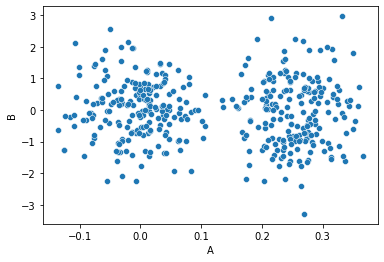

In [5]:
sns.scatterplot(df1["A"], df1["B"])

C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='B'>

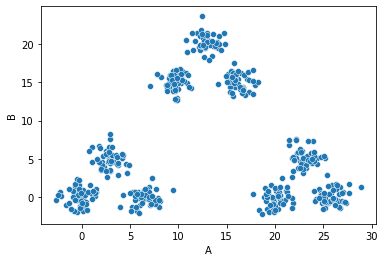

In [6]:
sns.scatterplot(df2["A"], df2["B"])


C:\Users\ASC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A', ylabel='B'>

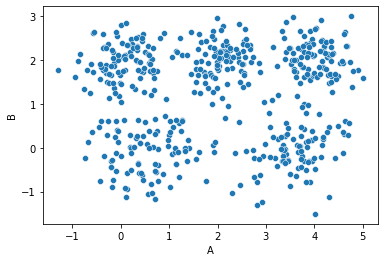

In [7]:
sns.scatterplot(df3["A"], df3["B"])

In [41]:
def SSE_calculator(df, centers, label_pred):
    sse = 0
    for i in label_pred:
        sse += math.sqrt(((df["A"][i]-centers[i][0])**2) + ((df["B"][i]-centers[i][1])**2))

    return sse

centers1:  [[ 0.11927991  0.71182715]
 [ 0.12873909 -0.88132197]]
SSE1:  830.5490859482915


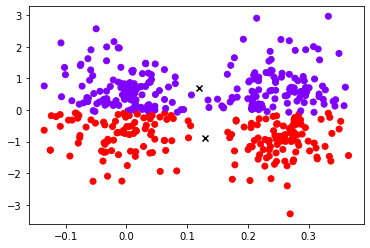

In [22]:
kmeans1 = KMeans(n_clusters = 2, random_state = 0).fit(df1)
centers1 = np.array(kmeans1.cluster_centers_)
labels1 = kmeans1.labels_
label_pred1 = kmeans1.fit_predict(df1)
df1_a = np.array(df1)
print("centers1: ", centers1)

plt.scatter(df1_a[:,0], df1_a[:,1], c=labels1, cmap='rainbow')
plt.scatter(kmeans1.cluster_centers_[:,0] ,kmeans1.cluster_centers_[:,1], color='black', marker="x")

print("SSE1: ", SSE_calculator(df1, centers1, label_pred1))


centers2:  [[20.02738714 -0.22284562]
 [ 9.65835456 15.08826824]
 [ 6.47161078 -0.12780626]
 [12.90964167 20.21423962]
 [23.06809785  5.1550355 ]
 [ 2.84988997  4.94242493]
 [25.81913993  0.04673579]
 [16.13507889 15.14369483]
 [-0.23091099  0.02934982]]
SSE2:  7266.587655331259


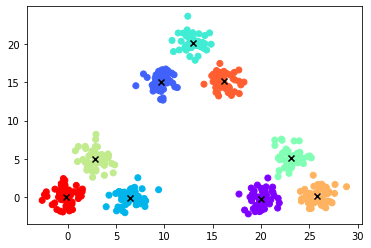

In [23]:
kmeans2 = KMeans(n_clusters = 9, random_state = 0).fit(df2)
centers2 = np.array(kmeans2.cluster_centers_)
labels2 = kmeans2.labels_
label_pred2 = kmeans2.fit_predict(df2)
df2_a = np.array(df2)
print("centers2: ", centers2)

plt.scatter(df2_a[:,0], df2_a[:,1], c=labels2, cmap='rainbow')
plt.scatter(kmeans2.cluster_centers_[:,0] ,kmeans2.cluster_centers_[:,1], color='black', marker="x")

print("SSE2: ", SSE_calculator(df2, centers2, label_pred2))

centers3:  [[ 0.55990885 -0.0918281 ]
 [ 4.02196517  2.0381927 ]
 [ 0.07190087  1.95680378]
 [ 3.5799822  -0.06140016]
 [ 2.07110263  1.99524376]]
SSE3:  1524.5269182945397


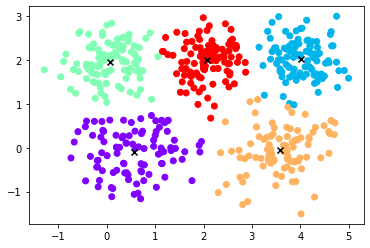

In [24]:
kmeans3 = KMeans(n_clusters = 5, random_state = 0).fit(df3)
centers3 = np.array(kmeans3.cluster_centers_)
labels3 = kmeans3.labels_
label_pred3 = kmeans3.fit_predict(df3)
df3_a = np.array(df3)
print("centers3: ", centers3)

plt.scatter(df3_a[:,0], df3_a[:,1], c=labels3, cmap='rainbow')
plt.scatter(kmeans3.cluster_centers_[:,0] ,kmeans3.cluster_centers_[:,1], color='black', marker="x")

print("SSE3: ", SSE_calculator(df3, centers3, label_pred3))

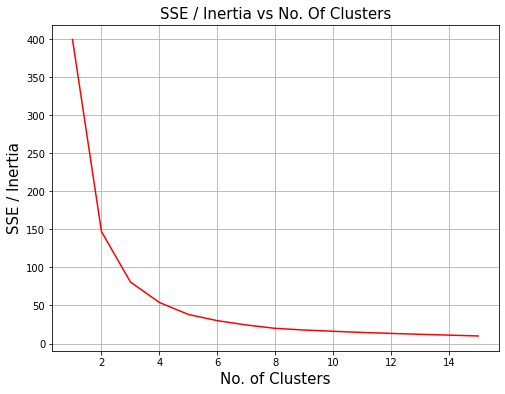

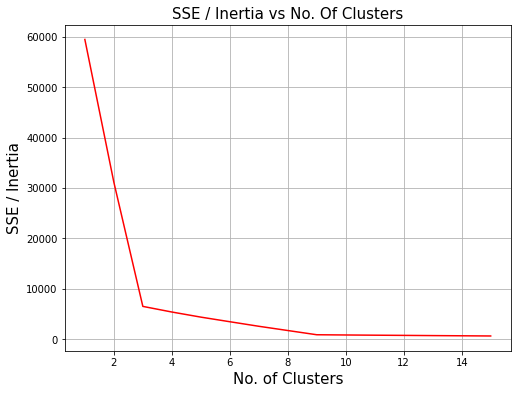

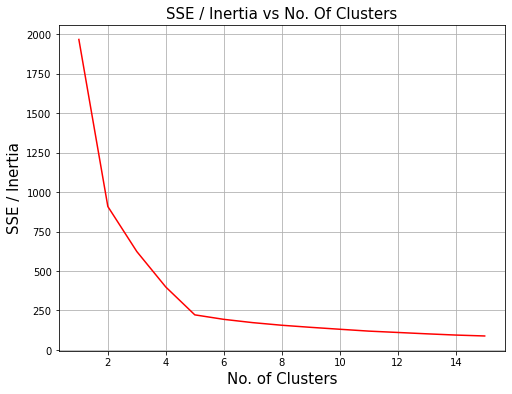

In [26]:
def SSE_Plot(df, column_indices, n_clusters=15, max_iter=50, tol=1e-04, init='k-means++', n_init=200, algorithm='auto'):
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

SSE_Plot(df1, [0, 1])
SSE_Plot(df2, [0, 1])
SSE_Plot(df3, [0, 1])


SSE1:  204.72066956761702


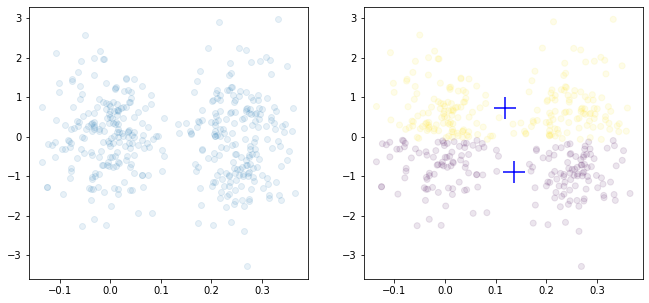

In [38]:
fcm1 = FCM(n_clusters = 2)
fcm1.fit(df1_a)
centers_fcm1 = fcm1.centers
labels_fcm1 = fcm1.predict(df1_a)
print("SSE1: ", SSE_calculator(df1, centers_fcm1, labels_fcm1))

f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(df1_a[:,0], df1_a[:,1], alpha=.1)
axes[1].scatter(df1_a[:,0], df1_a[:,1], c=labels_fcm1, alpha=.1)
axes[1].scatter(centers_fcm1[:,0], centers_fcm1[:,1], marker="+", s=500, c='b')
plt.show()

SSE2:  7168.186747115179


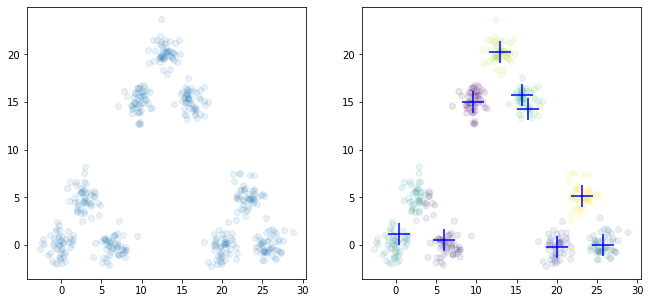

In [39]:
fcm2 = FCM(n_clusters = 9)
fcm2.fit(df2_a)
centers_fcm2 = fcm2.centers
labels_fcm2 = fcm2.predict(df2_a)
print("SSE2: ", SSE_calculator(df2, centers_fcm2, labels_fcm2))

f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(df2_a[:,0], df2_a[:,1], alpha=.1)
axes[1].scatter(df2_a[:,0], df2_a[:,1], c=labels_fcm2, alpha=.1)
axes[1].scatter(centers_fcm2[:,0], centers_fcm2[:,1], marker="+", s=500, c='b')
plt.show()

SSE3:  1552.532100593117


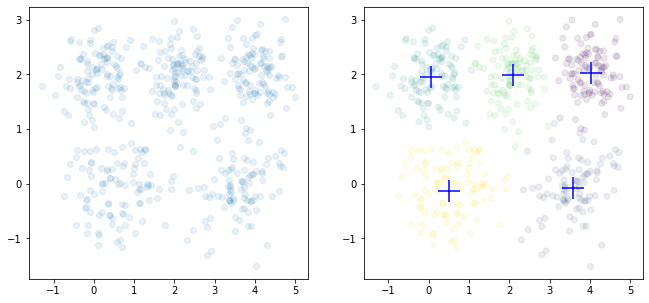

In [40]:
fcm3 = FCM(n_clusters = 5)
fcm3.fit(df3_a)
centers_fcm3 = fcm3.centers
labels_fcm3 = fcm3.predict(df3_a)
print("SSE3: ", SSE_calculator(df3, centers_fcm3, labels_fcm3))

f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(df3_a[:,0], df3_a[:,1], alpha=.1)
axes[1].scatter(df3_a[:,0], df3_a[:,1], c=labels_fcm3, alpha=.1)
axes[1].scatter(centers_fcm3[:,0], centers_fcm3[:,1], marker="+", s=500, c='b')
plt.show()

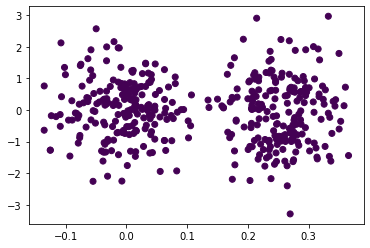

In [35]:
dbscan1 = DBSCAN(eps = 1.2, min_samples = 6).fit(df1_a)
labels_ds1 = dbscan1.labels_
plt.scatter(df1_a[:, 0], df1_a[:,1], c = labels_ds1)
plt.show()

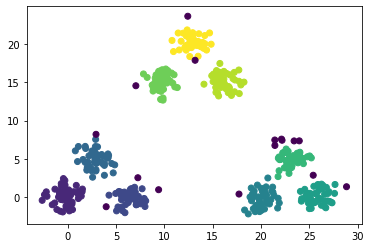

In [36]:
dbscan2 = DBSCAN(eps = 1.2, min_samples = 6).fit(df2_a)
labels_ds2 = dbscan2.labels_
plt.scatter(df2_a[:, 0], df2_a[:,1], c = labels_ds2)
plt.show()

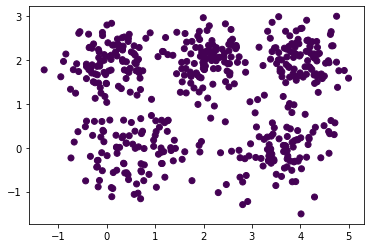

In [37]:
dbscan3 = DBSCAN(eps = 1.2, min_samples = 6).fit(df3_a)
labels_ds3 = dbscan3.labels_
plt.scatter(df3_a[:, 0], df3_a[:,1], c = labels_ds3)
plt.show()

In [43]:
data_table = {'K-means':  ['sse=830.5490859482915', 'sse=7266.587655331259', 'sse=1524.5269182945397'],
        'fuzzy-c-means': ['sse=204.72066956761702', 'sse=7168.186747115179', 'sse=1552.532100593117'],
        }

tabel = pd.DataFrame(data_table, index=['dataset1', 'dataset2', 'dataset3'])

print (tabel)

                         K-means           fuzzy-c-means
dataset1   sse=830.5490859482915  sse=204.72066956761702
dataset2   sse=7266.587655331259   sse=7168.186747115179
dataset3  sse=1524.5269182945397   sse=1552.532100593117
